In [182]:
!pip install spotipy

import pandas as pd
import numpy as np
import requests
import json
import spotipy
from pprint import pprint
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [184]:
test_df = pd.read_csv("../Resources/Final_2019_Chart.csv")
test_df.head()

,2019_bb_rank,2019_rev_rank,artist_name
0,1,100,Post Malone
1,2,99,Ariana Grande
2,3,98,Billie Eilish
3,4,97,Khalid
4,5,96,Drake


In [185]:
test_df['name2'] = ""
test_df['genres'] = ""
test_df['popularity'] = ""
test_df['uri_spotify'] = ""
test_df['followers'] = ""

test_df.head()

,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,100,Post Malone,,,,,
1,2,99,Ariana Grande,,,,,
2,3,98,Billie Eilish,,,,,
3,4,97,Khalid,,,,,
4,5,96,Drake,,,,,


In [186]:
user_id= '72c82b45eef743cb8a144c07882d9689'
token= '0b3a9740301246d790f7f91895124b38'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(user_id,token))

In [187]:
params= {
    "name2": "name", 
    "popularity": "popularity",
    "genres": "genres",
    "uri_spotify": "uri",
    "followers": "followers"
}

In [188]:
for index, row in test_df[:101].iterrows():

    # get artist_name from df
    person = row['artist_name']

    # add keyword to params dict
    params['keyword'] = person

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {person}.")
    results = spotify.search(q=f'artist: {person}', type='artist')
    
    artist_data = results['artists']['items']
    
    try:
        #print(f"Artist {person} is in dataset")
        #print(f"Trying to get name")
        test_df.loc[index, 'name2'] = artist_data[0]['name']
        #print(f"Trying to get popularity")
        test_df.loc[index, 'popularity'] = artist_data[0]['popularity']
        #print(f"Trying to get genres")
        #print(artist_data[0]['genres'])
        #print(type(artist_data[0]['genres']))
        test_df.loc[index, 'genres'] = str(artist_data[0]['genres'])
        test_df.loc[index, 'uri_spotify'] = str(artist_data[0]['uri'])
        test_df.loc[index, 'followers'] = str(artist_data[0]['followers']['total'])
    except Exception as e:
        print(e)

Retrieving Results for Index 0: Post Malone.
Retrieving Results for Index 1: Ariana Grande.
Retrieving Results for Index 2: Billie Eilish.
Retrieving Results for Index 3: Khalid.
Retrieving Results for Index 4: Drake.
Retrieving Results for Index 5: Travis Scott.
Retrieving Results for Index 6: Ed Sheeran.
Retrieving Results for Index 7: Taylor Swift.
Retrieving Results for Index 8: Lil Nas X.
Retrieving Results for Index 9: Halsey.
Retrieving Results for Index 10: Jonas Brothers.
Retrieving Results for Index 11: Juice WRLD.
Retrieving Results for Index 12: Cardi B.
Retrieving Results for Index 13: DaBaby.
Retrieving Results for Index 14: BTS.
Retrieving Results for Index 15: Panic! At The Disco.
Retrieving Results for Index 16: Luke Combs.
Retrieving Results for Index 17: Lil Baby.
Retrieving Results for Index 18: Shawn Mendes.
Retrieving Results for Index 19: Lizzo.
Retrieving Results for Index 20: Meek Mill.
Retrieving Results for Index 21: Queen.
Retrieving Results for Index 22: Da

In [189]:
## New dataset matching top BB artists with Spotify API data

test_df.loc[test_df['name2'] != '']


,2019_bb_rank,2019_rev_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,100,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29173640
1,2,99,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724
2,3,98,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34697267
3,4,97,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12829933
4,5,96,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376
...,...,...,...,...,...,...,...,...
95,96,5,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5464936
96,97,4,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25562055
97,98,3,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2745679
98,99,2,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653196


In [170]:
## Check Variable Types
test_df.dtypes

2019_bb_rank     int64
artist_name     object
name2           object
genres          object
popularity      object
uri_spotify     object
followers       object
dtype: object

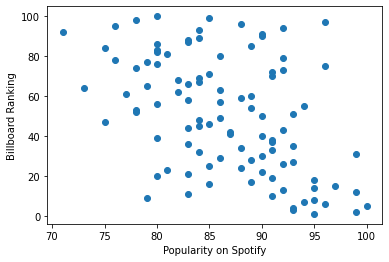

In [191]:
plt.scatter(test_df.iloc[:,5],test_df.iloc[:,0])
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
plt.show()

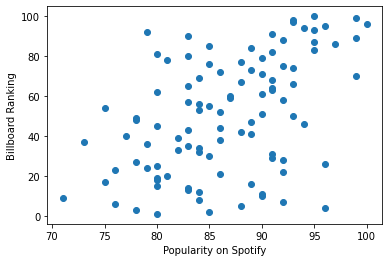

In [192]:
plt.scatter(test_df.iloc[:,5],test_df.iloc[:,1])
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
plt.show()

The correlation between both factors is -0.47


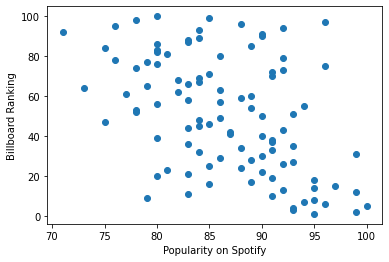

In [178]:
Popularity = test_df.iloc[:,4]
Billboard_Ranking = test_df.iloc[:,0]
correlation = st.pearsonr(Popularity,Billboard_Ranking)
plt.scatter(Popularity,Billboard_Ranking)
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.47


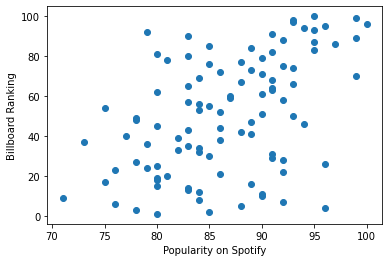

In [193]:
Popularity = test_df.iloc[:,5]
Billboard_Ranking = test_df.iloc[:,1]
correlation = st.pearsonr(Popularity,Billboard_Ranking)
plt.scatter(Popularity,Billboard_Ranking)
plt.xlabel('Popularity on Spotify')
plt.ylabel('Billboard Ranking')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.22004564814834987


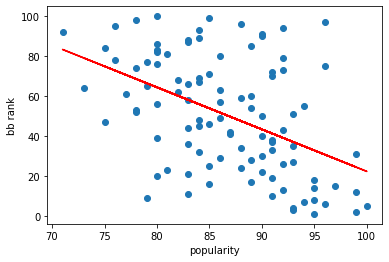

In [181]:


(slope, intercept, rvalue, pvalue, stderr)  = st.linregress(test_df['popularity'],test_df['2019_bb_rank'])

y_values = test_df['popularity']*model[0]+model[1]
plt.scatter(test_df['popularity'],test_df['2019_bb_rank'])
plt.plot(test_df['popularity'],y_values,color="red")

plt.xlabel('popularity')
plt.ylabel('bb rank')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.22004564814834987


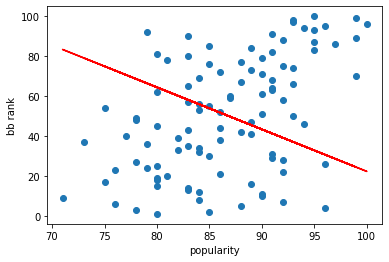

In [194]:


(slope, intercept, rvalue, pvalue, stderr)  = st.linregress(test_df['popularity'],test_df['2019_rev_rank'])

y_values = test_df['popularity']*model[0]+model[1]
plt.scatter(test_df['popularity'],test_df['2019_rev_rank'])
plt.plot(test_df['popularity'],y_values,color="red")

plt.xlabel('popularity')
plt.ylabel('bb rank')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [190]:
## Data cleaning - transform variables to integers
test_df["popularity"]=test_df["popularity"].astype(int)
test_df["followers"]=test_df["followers"].astype(int)

In [11]:
## Understanding variety in genres category
test_df.genres.value_counts()

['dance pop', 'pop', 'post-teen pop']                                               2
['pop', 'uk pop']                                                                   2
['dance pop', 'pop']                                                                2
['dance pop', 'pop', 'pop dance', 'post-teen pop']                                  2
['melodic rap', 'rap', 'trap']                                                      2
                                                                                   ..
['contemporary country', 'texas country']                                           1
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']    1
['baton rouge rap', 'trap']                                                         1
['melodic rap', 'philly rap', 'rap', 'trap']                                        1
['contemporary country', 'pop']                                                     1
Name: genres, Length: 91, dtype: int64

In [12]:
## Even though there is 1-100 rank on BB charts, these artists have similar rankings in Spotify Popularity
test_df.popularity.value_counts()

80     8
83     8
84     7
91     7
92     6
90     6
86     5
85     5
93     5
89     5
78     4
88     4
95     4
99     3
96     3
79     3
87     2
76     2
94     2
82     2
81     2
75     2
73     1
100    1
77     1
97     1
71     1
Name: popularity, dtype: int64

In [13]:
## Mean popularity of 100 artists
pop_avg = test_df["popularity"].mean()
print(pop_avg)

86.6


In [14]:
## Median popularity of 100 artist
pop_med = test_df["popularity"].median()
print(pop_med)

86.0


In [15]:
## Mean followers of 100 artists
foll_avg = test_df["followers"].mean()
print(foll_avg)

11254196.7


In [16]:
## Median followers of 100 artist
foll_med = test_df["followers"].median()
print(foll_med)

5570411.0


In [17]:
## min and max popularity score across billboard top 100
pop_min = test_df["popularity"].min()
pop_max = test_df["popularity"].max()

print(pop_min)
print(pop_max)

71
100


In [18]:
## min and max followers across billboard top 100
foll_min = test_df["followers"].min()
foll_max = test_df["followers"].max()
total_foll = sum(test_df['followers'])

print(foll_min)
print(foll_max)
print(total_foll)

161775
71783101
1125419670


In [19]:
## Who are the Billboard top 10
top_10_df = test_df.loc[test_df["2019_bb_rank"] < 11, :]
top_10_df

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
0,1,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29173640
1,2,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724
2,3,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34697267
3,4,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12829933
4,5,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376
5,6,Travis Scott,Travis Scott,['rap'],96,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,13434540
6,7,Ed Sheeran,Ed Sheeran,"['pop', 'uk pop']",94,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,71783101
7,8,Taylor Swift,Taylor Swift,"['dance pop', 'pop', 'pop dance', 'post-teen p...",95,spotify:artist:06HL4z0CvFAxyc27GXpf02,33485486
8,9,Lil Nas X,Lil Nas X,"['country rap', 'lgbtq+ hip hop', 'pop rap']",79,spotify:artist:7jVv8c5Fj3E9VhNjxT4snq,3624644
9,10,Halsey,Halsey,"['dance pop', 'electropop', 'etherpop', 'indie...",91,spotify:artist:26VFTg2z8YR0cCuwLzESi2,12622150


In [20]:
## What is the min-max and median pop scores and followers stats for top 10 bb artists?
pop_min_10 = top_10_df["popularity"].min()
pop_max_10 = top_10_df["popularity"].max()

print(pop_min_10)
print(pop_max_10)


foll_min_10 = top_10_df["followers"].min()
foll_max_10 = top_10_df["followers"].max()
total_foll_10 = sum(top_10_df['followers'])

print(foll_min_10)
print(foll_max_10)
print(total_foll_10)

pop_med_top = top_10_df["popularity"].median()
print(pop_med_top)

foll_med_top = top_10_df["followers"].median()
print(foll_med_top)

79
100
3624644
71783101
314815861
94.5
31329563.0


In [21]:
## Who are the Billboard Bottom 10
bottom_10_df = test_df.loc[test_df["2019_bb_rank"] > 89, :]
bottom_10_df

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
89,90,Kendrick Lamar,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",90,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,15770741
90,91,Polo G,Polo G,['chicago rap'],90,spotify:artist:6AgTAQt8XS6jRWi4sX7w49,2382140
91,92,Sheck Wes,Sheck Wes,"['rap', 'trap', 'underground hip hop', 'vapor ...",71,spotify:artist:2RDOrhPqAM4jzTRCEb19qX,981104
92,93,Migos,Migos,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",84,spotify:artist:6oMuImdp5ZcFhWP0ESe6mG,10919803
93,94,Lil Uzi Vert,Lil Uzi Vert,"['melodic rap', 'philly rap', 'rap', 'trap']",92,spotify:artist:4O15NlyKLIASxsJ0PrXPfz,10065137
94,95,Nipsey Hussle,Nipsey Hussle,"['conscious hip hop', 'gangster rap', 'hip hop...",76,spotify:artist:0EeQBlQJFiAfJeVN2vT9s0,1750629
95,96,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5464936
96,97,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25562055
97,98,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2745679
98,99,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653196


In [22]:
## What is the min-max and median pop scores and followers stats for bottom 10 bb artists?
pop_min_90 = bottom_10_df["popularity"].min()
pop_max_90 = bottom_10_df["popularity"].max()

print(pop_min_90)
print(pop_max_90)


foll_min_90 = bottom_10_df["followers"].min()
foll_max_90 = bottom_10_df["followers"].max()
total_foll_90 = sum(bottom_10_df['followers'])

print(foll_min_90)
print(foll_max_90)
print(total_foll_90)


pop_med_bottom = bottom_10_df["popularity"].median()
print(pop_med_bottom)

foll_med_bottom = bottom_10_df["followers"].median()
print(foll_med_bottom)

71
96
653196
25562055
82118162
85.0
5464936.0


In [23]:
## Top artists in terms of Spotify Pop
pop_sort_df = test_df.sort_values("popularity", ascending=False)
pop_sort_df.head(10)

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
4,5,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376
1,2,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724
11,12,Juice WRLD,Juice WRLD,"['chicago rap', 'melodic rap']",99,spotify:artist:4MCBfE4596Uoi2O4DtmEMz,13266070
30,31,Bad Bunny,Bad Bunny,"['latin', 'reggaeton', 'trap latino']",99,spotify:artist:4q3ewBCX7sLwd24euuV69X,26265604
14,15,BTS,BTS,"['k-pop', 'k-pop boy group']",97,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,24755789
96,97,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25562055
74,75,Justin Bieber,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",96,spotify:artist:1uNFoZAHBGtllmzznpCI3s,39214943
5,6,Travis Scott,Travis Scott,['rap'],96,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,13434540
0,1,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29173640
17,18,Lil Baby,Lil Baby,"['atl hip hop', 'atl trap', 'rap']",95,spotify:artist:5f7VJjfbwm532GiveGC0ZK,5372519


In [24]:
## Top artists in terms of Spotify Followers
foll_sort_df = test_df.sort_values("followers", ascending=False)
foll_sort_df.head(10)

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
6,7,Ed Sheeran,Ed Sheeran,"['pop', 'uk pop']",94,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,71783101
1,2,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724
4,5,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376
74,75,Justin Bieber,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",96,spotify:artist:1uNFoZAHBGtllmzznpCI3s,39214943
54,55,Eminem,Eminem,"['detroit hip hop', 'hip hop', 'rap']",94,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,39078037
2,3,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34697267
7,8,Taylor Swift,Taylor Swift,"['dance pop', 'pop', 'pop dance', 'post-teen p...",95,spotify:artist:06HL4z0CvFAxyc27GXpf02,33485486
29,30,Imagine Dragons,Imagine Dragons,"['modern rock', 'pop', 'rock']",90,spotify:artist:53XhwfbYqKCa1cC15pYq2q,30723081
21,22,Queen,Queen,"['classic rock', 'glam rock', 'rock']",90,spotify:artist:1dfeR4HaWDbWqFHLkxsg1d,29836055
18,19,Shawn Mendes,Shawn Mendes,"['canadian pop', 'dance pop', 'pop', 'post-tee...",91,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,29743681


In [25]:
## Bottom artists in terms of Spotify Pop
pop_sort_low_df = test_df.sort_values("popularity", ascending=True)
pop_sort_low_df.head(10)

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
91,92,Sheck Wes,Sheck Wes,"['rap', 'trap', 'underground hip hop', 'vapor ...",71,spotify:artist:2RDOrhPqAM4jzTRCEb19qX,981104
63,64,Billy Ray Cyrus,Billy Ray Cyrus,['country'],73,spotify:artist:60rpJ9SgigSd16DOAG7GSa,174200
46,47,Lauren Daigle,Lauren Daigle,"['ccm', 'christian alternative rock', 'christi...",75,spotify:artist:40LHVA5BTQp9RxHOQ9JPYj,1464851
83,84,Paul McCartney,Paul McCartney,"['album rock', 'art rock', 'beatlesque', 'clas...",75,spotify:artist:4STHEaNw4mPZ2tzheohgXB,3208871
77,78,Carrie Underwood,Carrie Underwood,"['contemporary country', 'country', 'country d...",76,spotify:artist:4xFUf1FHVy696Q1JQZMTRj,4222467
94,95,Nipsey Hussle,Nipsey Hussle,"['conscious hip hop', 'gangster rap', 'hip hop...",76,spotify:artist:0EeQBlQJFiAfJeVN2vT9s0,1750629
60,61,Normani,Normani,"['dance pop', 'pop', 'post-teen pop', 'r&b']",77,spotify:artist:2cWZOOzeOm4WmBJRnD5R7I,1015665
73,74,Blake Shelton,Blake Shelton,"['contemporary country', 'country', 'country r...",78,spotify:artist:1UTPBmNbXNTittyMJrNkvw,5382165
51,52,Ella Mai,Ella Mai,"['dance pop', 'pop', 'pop r&b', 'pop rap', 'po...",78,spotify:artist:7HkdQ0gt53LP4zmHsL0nap,3143752
52,53,Bradley Cooper,Bradley Cooper,['hollywood'],78,spotify:artist:4VIvfOurcf0vuLRxLkGnIG,161775


In [26]:
## Bottom artists in terms of Spotify Followers
foll_sort_low_df = test_df.sort_values("followers", ascending=True)
foll_sort_low_df.head(10)

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers
52,53,Bradley Cooper,Bradley Cooper,['hollywood'],78,spotify:artist:4VIvfOurcf0vuLRxLkGnIG,161775
63,64,Billy Ray Cyrus,Billy Ray Cyrus,['country'],73,spotify:artist:60rpJ9SgigSd16DOAG7GSa,174200
85,86,Maren Morris,Maren Morris,"['contemporary country', 'texas country']",80,spotify:artist:6WY7D3jk8zTrHtmkqqo5GI,526346
98,99,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653196
87,88,Mustard,Mustard,"['cali rap', 'hip hop', 'pop rap', 'rap', 'sou...",83,spotify:artist:0YinUQ50QDB7ZxSCLyQ40k,766299
66,67,Morgan Wallen,Morgan Wallen,"['contemporary country', 'deep talent show']",84,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,951179
40,41,Swae Lee,Swae Lee,"['melodic rap', 'pop rap', 'rap', 'trap']",87,spotify:artist:1zNqQNIdeOUZHb8zbZRFMX,961823
91,92,Sheck Wes,Sheck Wes,"['rap', 'trap', 'underground hip hop', 'vapor ...",71,spotify:artist:2RDOrhPqAM4jzTRCEb19qX,981104
75,76,City Girls,City Girls,"['pop', 'scam rap', 'trap queen']",80,spotify:artist:37hAfseJWi0G3Scife12Il,991690
60,61,Normani,Normani,"['dance pop', 'pop', 'post-teen pop', 'r&b']",77,spotify:artist:2cWZOOzeOm4WmBJRnD5R7I,1015665


In [49]:
bins = [0, 19, 39, 59, 79, 100]

# Create labels for these bins
group_labels = ["1-20", "21-40", "41-60", "61-80", "81-100"]

pd.cut(test_df['2019_bb_rank'], bins, labels=group_labels).head()

test_df["Grouped BB Rank"] = pd.cut(test_df["2019_bb_rank"], bins, labels=group_labels)
test_df.head(100)

,2019_bb_rank,artist_name,name2,genres,popularity,uri_spotify,followers,Grouped BB Rank
0,1,Post Malone,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,spotify:artist:246dkjvS1zLTtiykXe5h60,29173640,1-20
1,2,Ariana Grande,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,52571724,1-20
2,3,Billie Eilish,Billie Eilish,"['electropop', 'pop']",93,spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH,34697267,1-20
3,4,Khalid,Khalid,"['alternative r&b', 'pop']",93,spotify:artist:6LuN9FCkKOj5PcnpouEgny,12829933,1-20
4,5,Drake,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,spotify:artist:3TVXtAsR1Inumwj472S9r4,50593376,1-20
...,...,...,...,...,...,...,...,...
95,96,Fleetwood Mac,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,spotify:artist:08GQAI4eElDnROBrJRGE0X,5464936,81-100
96,97,The Weeknd,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,25562055,81-100
97,98,Eric Church,Eric Church,"['contemporary country', 'country', 'country r...",78,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,2745679,81-100
98,99,benny blanco,benny blanco,"['electropop', 'pop', 'pop rap']",85,spotify:artist:5CiGnKThu5ctn9pBxv7DGa,653196,81-100


In [62]:
BB_group = test_df.groupby("Grouped BB Rank")


# Get the average of each column within the GroupBy object
BB_group[["popularity", "followers"]].mean()

,popularity,followers
Grouped BB Rank,,
1-20,92.684211,2.233647e+07
21-40,87.850000,1.184395e+07
41-60,85.600000,9.951823e+06
61-80,83.950000,7.444834e+06
81-100,83.380952,5.534025e+06


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

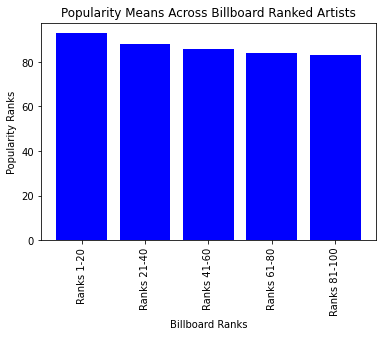

In [180]:
new_groups = ["Ranks 1-20", "Ranks 21-40", "Ranks 41-60", "Ranks 61-80", "Ranks 81-100"]
pop_groups = [93, 88, 86, 84, 83]
plt.bar(new_groups, pop_groups, color="b", align="center")
plt.title("Popularity Means Across Billboard Ranked Artists")
plt.xlabel("Billboard Ranks")
plt.ylabel("Popularity Ranks")
plt.xticks(rotation="vertical")



In [73]:
## NEXT STEPS
##fix links?, Retitle columns
## Get frequency of genres-- recode into single genres? or split across cells?

## Analysis:
#BB Chart rank of top 10 artists and thier Spotify popularity numbers, and number of followers?
## What are the comparison stats of the bottom 10
## What types of musical genres are in the top 100 artists? What's the most popular genre amongst them?
## Is there a correlation between spotify rank and number of followers? with BB artist rank and followers?
##Create a final exported file with data and links?



In [195]:
test_df = test_df.rename(columns={'2019_bb_rank': '2019 Year-End Billboard Rank', 'artist_name':'Artist Name', 'genres':'Genres','popularity': 'Spotify Popularity', 'followers':'Followers'})
test_df.head()
test_df = test_df.drop(columns=['name2','uri_spotify'])
test_df.head()

,2019 Year-End Billboard Rank,2019_rev_rank,Artist Name,Genres,Spotify Popularity,Followers
0,1,100,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,29173640
1,2,99,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,52571724
2,3,98,Billie Eilish,"['electropop', 'pop']",93,34697267
3,4,97,Khalid,"['alternative r&b', 'pop']",93,12829933
4,5,96,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,50593376


In [196]:
bins = [0, 5000000, 10000000, 15000000, 20000000, 1000000000]
group_labels = ["<5 Million", "5 - 10 Million", "10 - 15 Million", "15 - 20 Million", ">20 Million"]

In [201]:
test_df["Grouped Followers"] = pd.cut(test_df["Followers"], bins, labels=group_labels)
test_df.head(100)

,2019 Year-End Billboard Rank,2019_rev_rank,Artist Name,Genres,Spotify Popularity,Followers,Grouped Followers
0,1,100,Post Malone,"['dfw rap', 'melodic rap', 'rap']",95,29173640,>20 Million
1,2,99,Ariana Grande,"['dance pop', 'pop', 'post-teen pop']",99,52571724,>20 Million
2,3,98,Billie Eilish,"['electropop', 'pop']",93,34697267,>20 Million
3,4,97,Khalid,"['alternative r&b', 'pop']",93,12829933,10 - 15 Million
4,5,96,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",100,50593376,>20 Million
...,...,...,...,...,...,...,...
95,96,5,Fleetwood Mac,"['album rock', 'classic rock', 'mellow gold', ...",88,5464936,5 - 10 Million
96,97,4,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ...",96,25562055,>20 Million
97,98,3,Eric Church,"['contemporary country', 'country', 'country r...",78,2745679,<5 Million
98,99,2,benny blanco,"['electropop', 'pop', 'pop rap']",85,653196,<5 Million


In [205]:
new_foll_group = test_df.groupby("Grouped Followers")


# Get the average of each column within the GroupBy object
new_foll_group[["Spotify Popularity", "2019 Year-End Billboard Rank"]].mean()

,Spotify Popularity,2019 Year-End Billboard Rank
Grouped Followers,,
<5 Million,81.813953,59.581395
5 - 10 Million,86.809524,57.047619
10 - 15 Million,91.384615,35.461538
15 - 20 Million,87.600000,60.800000
>20 Million,94.055556,29.166667


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

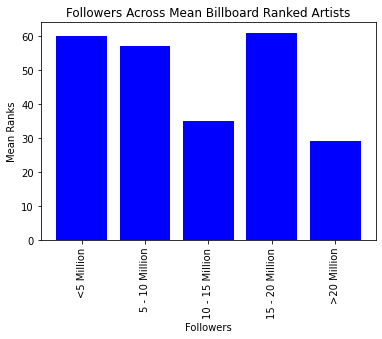

In [209]:
new_follower_charts = ["<5 Million", "5 - 10 Million", "10 - 15 Million", "15 - 20 Million", ">20 Million"]
year_end_chart = [60, 57, 35, 61, 29]
plt.bar(new_follower_charts, year_end_chart, color="b", align="center")
plt.title("Followers Across Mean Billboard Ranked Artists")
plt.xlabel("Followers")
plt.ylabel("Mean Ranks")
plt.xticks(rotation="vertical")


In [121]:
import ast

all_genres = []

for index, artist in test_df.iterrows():
    
    genres = ast.literal_eval(artist['genres'])
    
    for genre in genres:
        all_genres.append(genre)
        
all_genres

genre_series = pd.Series(all_genres)

genre_counts = genre_series.value_counts()

genre_counts.head(10)

pop                     35
rap                     32
pop rap                 20
trap                    19
dance pop               18
hip hop                 14
post-teen pop           14
contemporary country    13
melodic rap             11
rock                    10
dtype: int64

Text(0, 0.5, 'Count Across Artists')

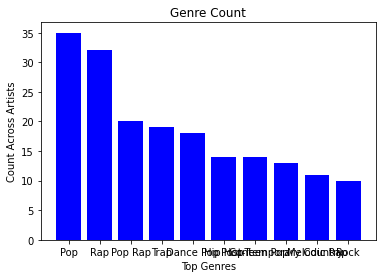

In [122]:
ten_genres = ["Pop", "Rap", "Pop Rap", "Trap", "Dance Pop", "Hip Hop", "Post-Teen Pop", "Contemporary Country", "Melodic Rap", "Rock"]
genre_numbers = [35, 32, 20, 19, 18, 14, 14, 13, 11, 10]
plt.bar(ten_genres, genre_numbers, color="b", align="center")
plt.title("Genre Count")
plt.xlabel("Top Genres")
plt.ylabel("Count Across Artists")



In [ ]:
## REST IS SAVED CODE FOR FUTURE USE

In [ ]:
print(artist_data[0]['genres'])
test_df.head()
test_genres = []
for x in test_df['Artist Name']:
    test_genres = test_df['Genres'].loc[test_df['Artist Name'] == x]
    print(test_genres)

In [ ]:
test_df = pd.Series(sum([item for item in "genres"], [])).value_counts()

In [11]:
genres_all = []
for x in 'genres':
    genres_all.append(x)

print(genres_all)

['g', 'e', 'n', 'r', 'e', 's']


In [84]:
#### SAVED CODE DO NOT DELETE #spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

name = 'Taylor Swift'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'])
    print(artist['popularity'])
    print(artist['name'], artist['images'][0]['url'])

Taylor Swift
95
Taylor Swift https://i.scdn.co/image/a37efbc7fd3f5f5df81b48ce9c6de53820b239c1


In [ ]:
# Rename the headers to be more explanatory
renamed_df = reduced_df.rename(columns={"isbn": "ISBN",
                                        "original_title": "Original Title",
                                        "original_publication_year": "Publication Year",
                                        "authors": "Authors",
                                        "ratings_1": "One Star Reviews",
                                        "ratings_2": "Two Star Reviews",
                                        "ratings_3": "Three Star Reviews",
                                        "ratings_4": "Four Star Reviews",
                                        "ratings_5": "Five Star Reviews", })
renamed_df.head()